In [2]:
# Import necessary libraries numpy as np, pandas as pd, pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%matplotlib inline
# The above command sets the backend of matplotlib to the 'inline' backend.
# It means the output of plotting commands is displayed inline.


In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("ashydv/advertising-dataset")

print("Path to dataset files:", path)

100%|██████████| 1.83k/1.83k [00:00<00:00, 956kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/ashydv/advertising-dataset/versions/1


In [5]:
#Import the data

df = pd.read_csv("/content/archive.zip")
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


In [6]:
#drop radio and newspaper column
df = df.drop(['Radio', 'Newspaper'], axis=1)
df

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9
...,...,...
195,38.2,7.6
196,94.2,14.0
197,177.0,14.8
198,283.6,25.5


In [7]:
# View the dimensions of df
df.shape

(200, 2)

In [8]:
# View the top 5 rows of df
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,12.0
3,151.5,16.5
4,180.8,17.9


In [9]:
# View dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   TV      200 non-null    float64
 1   Sales   200 non-null    float64
dtypes: float64(2)
memory usage: 3.3 KB


In [10]:
# View descriptive statistics
df.describe()

,TV,Sales
count,200.000000,200.000000
mean,147.042500,15.130500
std,85.854236,5.283892
min,0.700000,1.600000
25%,74.375000,11.000000
50%,149.750000,16.000000
75%,218.825000,19.050000
max,296.400000,27.000000


In [11]:
# Declare feature variable and target variable

# TV and Sales data values are given by X and y respectively.

# Values attribute of pandas dataframe returns the numpy arrays.

X = df.values[:, 0]

y = df.values[:, 1]


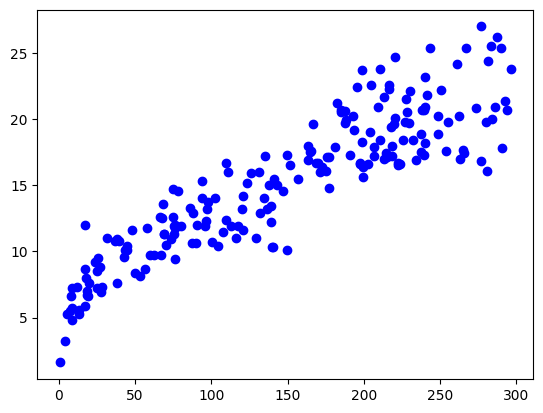

In [12]:
# Plot scatter plot between X and y
plt.scatter(X, y, c='blue')

In [13]:
# import seaborn with alias sns
import seaborn as sns

# import %matplotlib inline to visualise in the notebook
%matplotlib inline


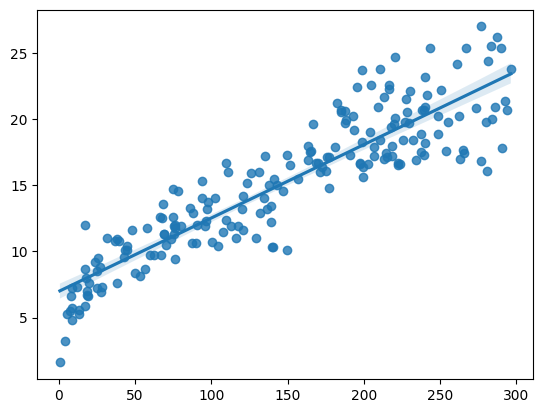

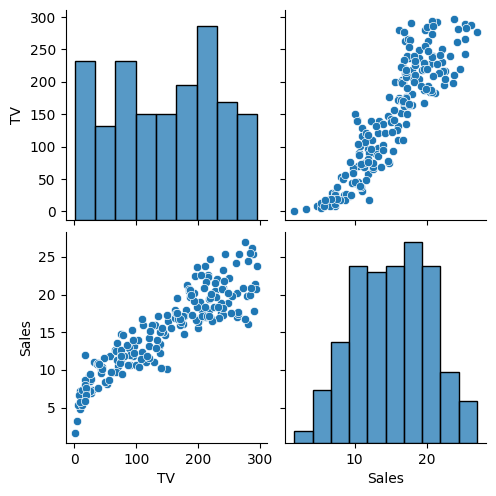

In [14]:
# Visualise the relationship between the features and the response using scatterplots
sns.regplot(x=X, y=y)


# plot a pairplot also for df
sns.pairplot(df)

In [15]:
# Print the dimensions of X and y
print(X.shape)
print(y.shape)

(200,)
(200,)


In [16]:
# Reshape X and y
X = X.reshape(-1, 1)
y = y.reshape(-1, 1)

In [17]:
# Print the dimensions of X and y after reshaping
print(X.shape)
print(y.shape)


(200, 1)
(200, 1)


In [18]:
# import train test split
from sklearn.model_selection import train_test_split


# Split X and y into training and test data sets

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
# print shapes of X_train,y_train, X_test, y_test
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(140, 1)
(140, 1)
(60, 1)
(60, 1)


In [20]:
# Fit the linear model
from sklearn.linear_model import LinearRegression

# Instantiate the linear regression object lm

lm = LinearRegression()


# Train the model using training data sets
lm.fit(X_train,y_train)


# Predict on the test data
y_pred = lm.predict(X_test)

In [21]:
# Compute model slope and intercept

a = lm.coef_
b = lm.intercept_

# also print a and b
print(a)
print(b)

[[0.05473199]]
[7.14382225]


In [22]:
# So comment below, our fitted regression line here is ?

#y=0.05483488 * x + 7.20655455

#Dependent Variable (y): This is the outcome or response variable that the model is trying to predict or explain.
#Independent Variable (x): This is the predictor or explanatory variable used to model the changes in (y).
#Slope (m)): The coefficient of (x), which is (0.05483488) in this case. The slope indicates that for every one-unit increase in (x), the predicted value of (y) increases by approximately 0.0548 units.
#Y-Intercept (b): The constant term, which is (7.20655455). The intercept represents the predicted value of (y) when the independent variable (x) is equal to zero .

# That is our linear model.

In [23]:
# Predicting Sales values on first five 5 TV  datasets only
lm.predict(X[:5])

array([[19.73765398],
       [ 9.57939597],
       [ 8.08521254],
       [15.43571928],
       [17.03936669]])

In [24]:
# prediction for all X present in the dataset
lm.predict(X)

array([[19.73765398],
       [ 9.57939597],
       [ 8.08521254],
       [15.43571928],
       [17.03936669],
       [ 7.6199906 ],
       [10.29091188],
       [13.72260788],
       [ 7.6145174 ],
       [18.07927457],
       [10.76160703],
       [18.89478127],
       [ 8.4464437 ],
       [12.48019163],
       [18.31462214],
       [17.8384538 ],
       [10.85465142],
       [22.54540525],
       [10.93127621],
       [15.20584491],
       [19.09728965],
       [20.13719753],
       [ 7.86628457],
       [19.63913639],
       [10.55362545],
       [21.53286336],
       [14.96502414],
       [20.28497391],
       [20.76114226],
       [11.007901  ],
       [23.17482317],
       [13.32306433],
       [12.46377203],
       [21.68063975],
       [12.38167404],
       [23.05441279],
       [21.75179134],
       [11.23230217],
       [ 9.50277118],
       [19.62271679],
       [18.22705095],
       [16.83138512],
       [23.21313557],
       [18.46787172],
       [ 8.51759529],
       [16

In [25]:
# Calculate and print Root Mean Square Error(RMSE)
from sklearn.metrics import mean_squared_error
import math
math.sqrt(mean_squared_error(y_test, y_pred))

2.3599871172248466

In [26]:
# Calculate and print r2_score
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8150168765722069

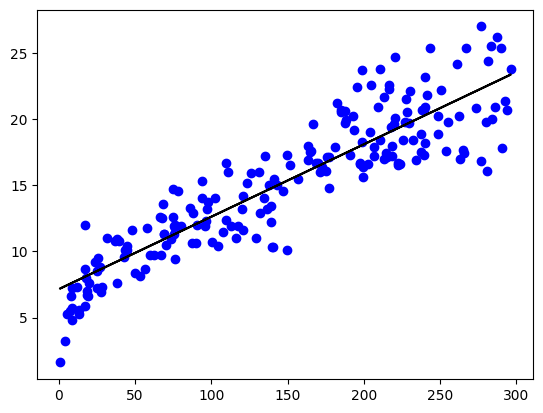

In [27]:
# Plot the Regression Line between X and Y as shown in below output.
plt.scatter(X, y, c='blue')
plt.plot(X, a*X + b, c='black')

In [28]:
# Calculate residuals from the sklearn model
residuals = y_test - y_pred

In [29]:
residuals

array([[ 3.68723791e-01],
       [-1.48042193e+00],
       [-9.15944728e-02],
       [ 2.40031921e+00],
       [ 2.40792440e-01],
       [-1.51976029e+00],
       [-4.19990598e-01],
       [-2.08497391e+00],
       [ 7.53556299e-01],
       [-1.35886418e+00],
       [ 2.75470783e+00],
       [-1.31645209e+00],
       [-2.14852448e-01],
       [ 3.17750935e+00],
       [ 4.74653437e-01],
       [-5.22607881e-01],
       [-4.28063975e+00],
       [-5.58213465e+00],
       [ 3.46769783e+00],
       [-1.82362968e+00],
       [ 3.31525639e+00],
       [-4.52272095e+00],
       [-6.27394329e-01],
       [-1.45202581e+00],
       [-1.97198391e+00],
       [ 1.31866934e+00],
       [ 1.39255961e+00],
       [ 4.23611906e+00],
       [-2.80378881e+00],
       [-1.75952923e-02],
       [ 1.64534858e+00],
       [ 5.66998422e+00],
       [-6.40709285e+00],
       [ 1.42745490e+00],
       [-2.26628457e+00],
       [-1.46731053e+00],
       [-7.05849071e-01],
       [ 8.60633308e-01],
       [ 2.7

In [31]:
y_log=np.log(y)
y_log
y_pred_log=np.log(y_pred)
y_pred_log

array([[2.39162806],
       [2.29055522],
       [2.49251054],
       [3.13548034],
       [2.80088505],
       [2.32432313],
       [2.03077514],
       [3.00988041],
       [2.13374549],
       [2.88808382],
       [3.06550514],
       [2.47791997],
       [2.75460628],
       [2.85776194],
       [2.42704327],
       [2.61904468],
       [3.07641968],
       [1.97159664],
       [2.41879375],
       [2.93511298],
       [3.13047047],
       [2.6961612 ],
       [2.81704775],
       [2.6638911 ],
       [2.3097577 ],
       [2.63054482],
       [2.78547042],
       [2.91038574],
       [2.96546835],
       [2.14213406],
       [2.38459369],
       [2.89203791],
       [3.1138305 ],
       [3.01418817],
       [2.06258585],
       [2.10013967],
       [2.34236806],
       [2.83552635],
       [2.38761448],
       [2.14149128],
       [2.21522087],
       [2.18243577],
       [2.70571575],
       [2.92400252],
       [2.94091138],
       [2.54669123],
       [2.03005661],
       [2.088

In [32]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y_log)

y_pred = model.predict(X_poly)
residuals = y_log - y_pred

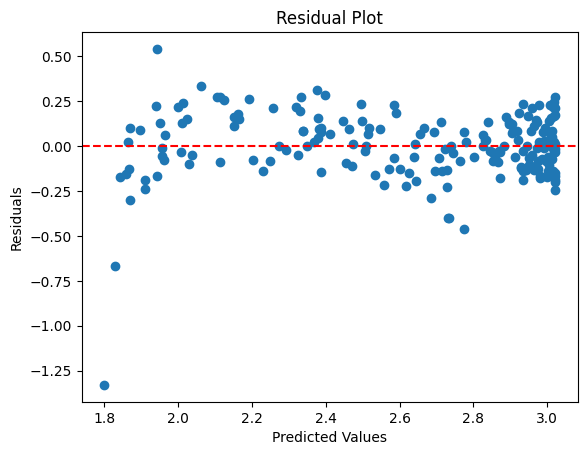

In [33]:
# Plotting residual errors
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [34]:
# Checking for Overfitting or Underfitting the data by calculation score using score function.
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.805941153711277
0.8150168765722069
